In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
import shapefile

from matplotlib.collections import LineCollection
from matplotlib import cm

<IPython.core.display.Javascript object>


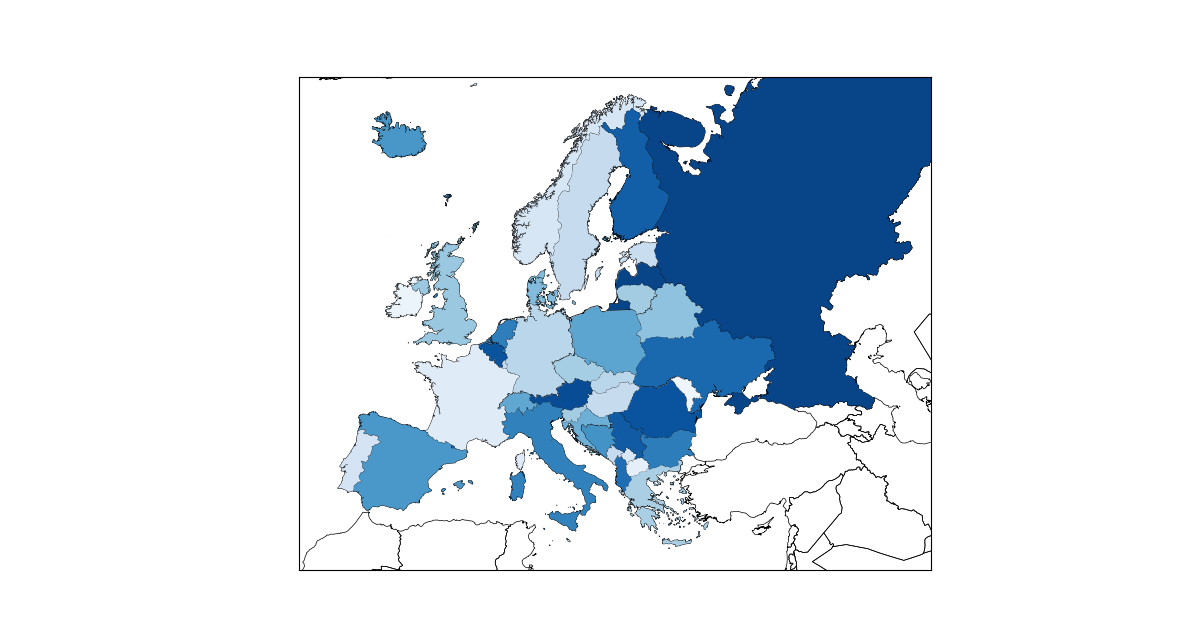

In [8]:
%matplotlib nbagg

plt.figure(figsize=(12,6.4))
ax = plt.subplot(111)

# On crée une carte, de projection lcc (Lambert Conformal), 
# voir la liste de projection ici : https://matplotlib.org/basemap/users/mapsetup.html
# la résolution

map = Basemap(projection='lcc', resolution='l', lat_0 = 50, lon_0 = 15, \
              llcrnrlon = -10, llcrnrlat = 30, urcrnrlon= 80, urcrnrlat = 60) 

sfile = 'ne_10m_admin_0_countries/ne_10m_admin_0_countries' # fichier contenant les shapes des pays
# tu peux le trouver sur natural earth : https://www.naturalearthdata.com/downloads/10m-cultural-vectors/10m-admin-0-countries/
# T'as plein d'autres outils sur ce site.
map.readshapefile(sfile, 'areas')     # on importe le shape file du monde entier (et on le dessine)

shp = shapefile.Reader(sfile) 
shapes = shp.shapes() # contient les shapes
records = shp.records() # contient des infos du style, à quel pays, continent, etc. appartient telle shape

for record, shape in zip(records,shapes):
    if ('Europe' in record): # ici dans le cas de l'Europe mais ça en soi osef
        lons,lats = zip(*shape.points)
        data = np.array(map(lons, lats)).T
        
# certaines shapes sont uniques et on n'a qu'une seule part à la shape (du style: le Luxembourg, l'Autriche, ...). 
        if len(shape.parts) == 1: 
            segs = [data,]
            
# Pour d'autres qui ont des îles par exemple ou une forme tordue, on peut avoir plusieurs shapes pour décrire le pays.
# Et donc tu dois les concaténer. J'avoue que j'ai du mal à voir pq on le fait comme c'est fait ici... 
# Mais si tu mets pas ce truc, tu vas avoir des formes qui partent en couilles pcq matplotlib comprend pas ce qu'il doit
# dessiner et fait des triangles partout. Note que l'île de Man et les couilles dans le genre ne sont pas regroupées
# avec le pays dont elles dépendent. Mais dans record normalement tu peux trouver l'info donc a priori ça ne devrait pas
# poser de problème.
        else:
            segs = []
            for i in range(1,len(shape.parts)):
                index = shape.parts[i-1]
                index2 = shape.parts[i]
                segs.append(data[index:index2])
            segs.append(data[index2:])

        lines = LineCollection(segs,antialiaseds=(1,))
# la couleur est fixée ici. TU peux changer le gradient comme tu fais d'hab I guess 
# ici j'utilise les colormaps de mpl (https://matplotlib.org/stable/tutorials/colors/colormaps.html)
        lines.set_facecolors(cm.Blues(np.random.rand(1))) 
        lines.set_edgecolors('k')
        lines.set_linewidth(0.1)
        ax.add_collection(lines)